<a href="https://colab.research.google.com/github/arturcgs/Alura_Cursos/blob/main/Formacao_Python_para_Data_Science/Data_Visualization_Seaborn/Data_Vis_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória
Este Notebook realiza uma análise exploratória dos dados de Gorjetas

Pra salvar no github:
Formacao_Python_para_Data_Science/Data_Visualization_Seaborn/Data_Vis_Seaborn.ipynb

## Importação e Tradução

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [2]:
url = 'https://raw.githubusercontent.com/arturcgs/Alura_Cursos/main/Formacao_Python_para_Data_Science/Data_Visualization_Seaborn/tips.csv'
dados = pd.read_csv(url)
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [3]:
#Traduzindo colunas
traducao = {
    'total_bill': 'total_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}

gorjetas = dados.rename(columns = traducao)

gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [4]:
#Traduzindo dados da sobremesa

traducao = {
    'No': 'Não',
    'Yes': 'Sim'
}

gorjetas['sobremesa'] = gorjetas['sobremesa'].map(traducao)
gorjetas['sobremesa'].unique()

array(['Não', 'Sim'], dtype=object)

In [5]:
# Traduzindo dias da semana

traducao = {
    'Sun': 'Dom', 
    'Sat': 'Sab', 
    'Thur': 'Qui', 
    'Fri': 'Sex'
}

gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(traducao)
gorjetas['dia_da_semana'].unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

In [6]:
# Traduzindo hora do dia

traducao = {
    'Dinner': 'Janta', 
    'Lunch': 'Almoço'
}

gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(traducao)
gorjetas['hora_do_dia'].unique()

array(['Janta', 'Almoço'], dtype=object)

In [7]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Janta,2
1,10.34,1.66,Não,Dom,Janta,3
2,21.01,3.50,Não,Dom,Janta,3
3,23.68,3.31,Não,Dom,Janta,2
4,24.59,3.61,Não,Dom,Janta,4


# Análise I - Valor da Conta e Gorjeta

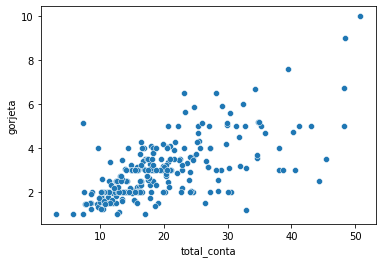

In [8]:
#Scatterplot

gorj_total = sns.scatterplot(x = 'total_conta', y = 'gorjeta', data = gorjetas)

Podemos ver q conforme maior o valor da conta, a gorjeta tende a ser maior

## Proporcionalidade

In [9]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['total_conta']).round(2)
gorjetas.head(3)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Janta,2,0.06
1,10.34,1.66,Não,Dom,Janta,3,0.16
2,21.01,3.50,Não,Dom,Janta,3,0.17


Text(0.5, 1.0, 'batata')

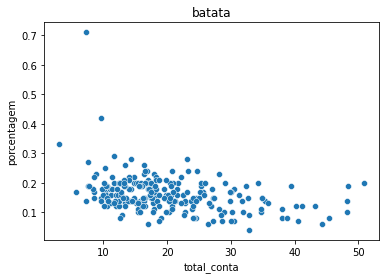

In [10]:
porcent_total = sns.scatterplot(x = 'total_conta', y = 'porcentagem', data = gorjetas)
porcent_total.set_title('batata')

Podemos ver, então, q conforme o total da conta aumenta, a pocentagem de gorjeta dada tende a diminuir um pouco

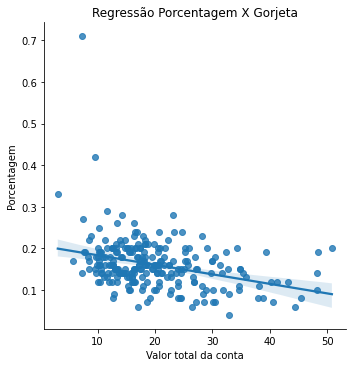

In [11]:
regressions = sns.lmplot(x = 'total_conta', y = 'porcentagem', data = gorjetas)
regressions.set(title = 'Regressão Porcentagem X Gorjeta', xlabel = 'Valor total da conta', ylabel = 'Porcentagem')

# Análise II - Sobremesa

In [12]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Janta,2,0.06
1,10.34,1.66,Não,Dom,Janta,3,0.16
2,21.01,3.50,Não,Dom,Janta,3,0.17
3,23.68,3.31,Não,Dom,Janta,2,0.14
4,24.59,3.61,Não,Dom,Janta,4,0.15


In [13]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,total_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [14]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,total_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


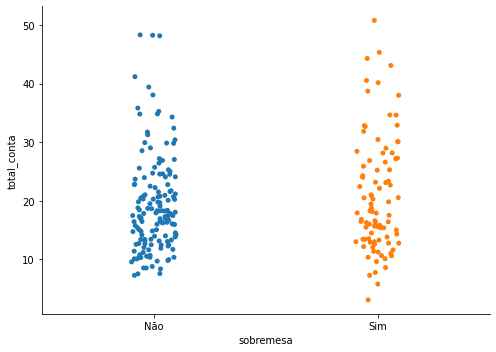

In [15]:
sns.catplot(x='sobremesa', y='total_conta', data=gorjetas, aspect=1.4)

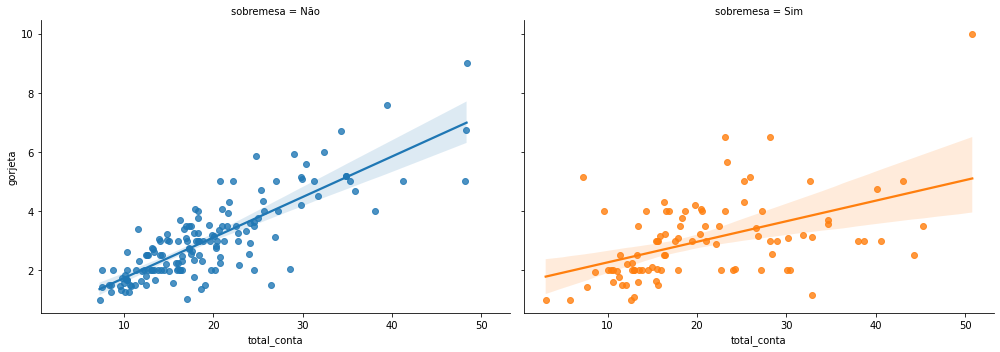

In [16]:
sns.lmplot(x='total_conta', y='gorjeta', data=gorjetas, col='sobremesa', hue='sobremesa', aspect=1.4)

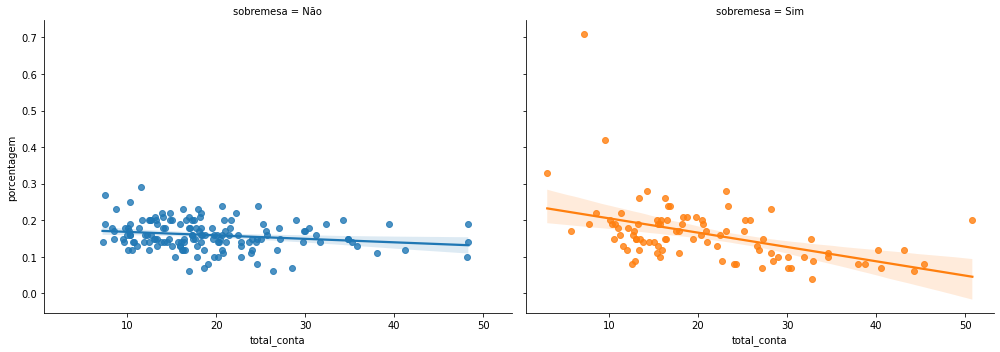

In [17]:
sns.lmplot(x='total_conta', y='porcentagem', data=gorjetas, col='sobremesa', hue='sobremesa', aspect=1.4)

Visualmente, a presença ou não de sobremesa, parece afetas o valor da gorjeta

## Teste de Hipótese

H0 -> A distribuição da taxa de gorjeta é a mesma nos dois grupos

H1 -> A distribuição da taxa de gorjeta não é a mesmo nos dois grupos

In [18]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor p é de {r.pvalue:.2f}')

O valor p é de 0.53


In [19]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").total_conta
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").total_conta
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor p é de {r.pvalue:.2f}')

O valor p é de 0.34


Com isso, não podemos rejeitar H0

Desta maneira, a distribuição da taxa de gorjeta é a mesma nos dois grupos

# Análise III - Dia da Semana

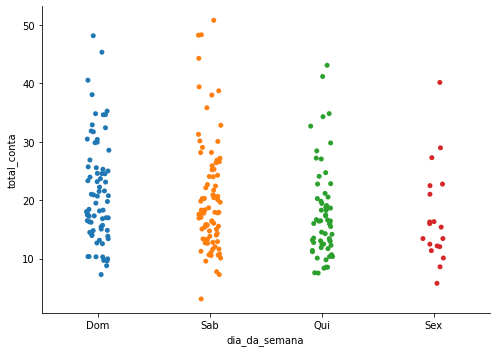

In [20]:
sns.catplot(x='dia_da_semana', y='total_conta', data=gorjetas, hue='dia_da_semana', aspect=1.4)

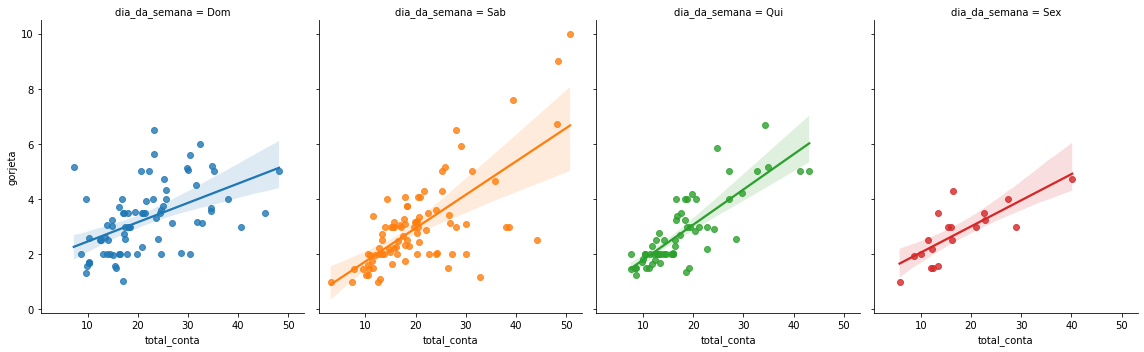

In [21]:
sns.lmplot(x='total_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas, aspect = 0.8)

In [22]:
print(f'A média total de gorjetas é de {gorjetas.gorjeta.mean():.2f}')

A média total de gorjetas é de 3.00


In [23]:
gorjetas.groupby(['dia_da_semana']).mean()

,total_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Dom,21.410000,3.255132,2.842105,0.166974
Qui,17.682742,2.771452,2.451613,0.161129
Sab,20.441379,2.993103,2.517241,0.153678
Sex,17.151579,2.734737,2.105263,0.169474


In [24]:
print("Frequência dos dias:")
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sab    87
Dom    76
Qui    62
Sex    19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

H0 --> A distribuição do valor da conta é igual no sábado e no domingo

H1 --> A distribuição do valor da conta não é igual no sábado e no domingo

In [25]:
conta_domingo = gorjetas.query("dia_da_semana == 'Dom'").total_conta
conta_sabado = gorjetas.query("dia_da_semana == 'Sab'").total_conta
r = ranksums(conta_domingo, conta_sabado)
print(f'O valor p é {r.pvalue}')

O valor p é 0.3576728477868443


Não podemos rejeitar H0, portanto a distribuição do valor da conta é igual no sábado e no domingo

H0 --> A distribuição do valor da conta é igual na sexta e no domingo

H1 --> A distribuição do valor da conta não é igual na sexta e no domingo

In [26]:
conta_domingo = gorjetas.query("dia_da_semana == 'Dom'").total_conta
conta_sexta = gorjetas.query("dia_da_semana == 'Sex'").total_conta
r = ranksums(conta_domingo, conta_sexta)
print(f'O valor p é {r.pvalue}')

O valor p é 0.026485858643654325


Aqui podemos rejeitar H0 e afirmar que a distribuição do valor da conta não é igual na sexta e no domingo

# Análise IV - Hora do Dia

In [27]:
gorjetas[gorjetas['hora_do_dia'] == 'Almoço'].describe()

,total_conta,gorjeta,total_de_pessoas,porcentagem
count,68.000000,68.000000,68.000000,68.000000
mean,17.168676,2.728088,2.411765,0.163971
std,7.713882,1.205345,1.040024,0.040266
min,7.510000,1.250000,1.000000,0.070000
25%,12.235000,2.000000,2.000000,0.140000
50%,15.965000,2.250000,2.000000,0.150000
75%,19.532500,3.287500,2.000000,0.190000
max,43.110000,6.700000,6.000000,0.270000


In [28]:
gorjetas[gorjetas['hora_do_dia'] == 'Janta'].describe()

,total_conta,gorjeta,total_de_pessoas,porcentagem
count,176.000000,176.000000,176.000000,176.000000
mean,20.797159,3.102670,2.630682,0.159773
std,9.142029,1.436243,0.910241,0.067426
min,3.070000,1.000000,1.000000,0.040000
25%,14.437500,2.000000,2.000000,0.120000
50%,18.390000,3.000000,2.000000,0.160000
75%,25.282500,3.687500,3.000000,0.190000
max,50.810000,10.000000,6.000000,0.710000


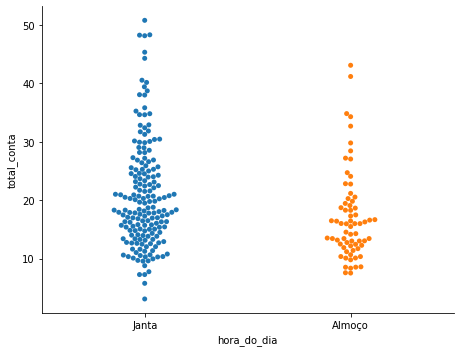

In [29]:
sns.catplot(x='hora_do_dia', y='total_conta', data=gorjetas, aspect=1.3, kind='swarm')

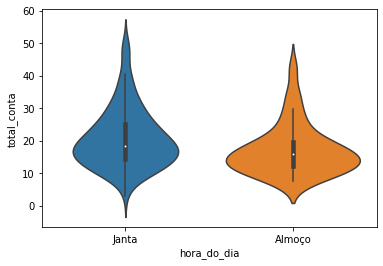

In [30]:
sns.violinplot(x='hora_do_dia', y='total_conta', data=gorjetas)

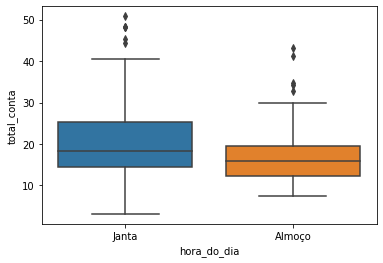

In [31]:
sns.boxplot(x='hora_do_dia', y='total_conta', data=gorjetas)

In [32]:
almoco = gorjetas[gorjetas.hora_do_dia == 'Almoço'].total_conta
janta = gorjetas[gorjetas.hora_do_dia == 'Janta'].total_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total da Conta')

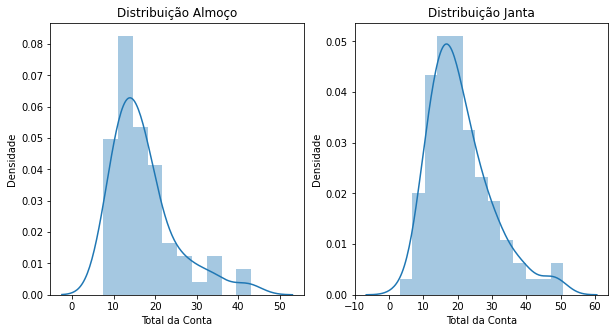

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(almoco, ax=axs[0]);
axs[0].set_title('Distribuição Almoço')
axs[0].set_ylabel('Densidade')
axs[0].set_xlabel('Total da Conta')

sns.distplot(janta, ax=axs[1]);
axs[1].set_title('Distribuição Janta')
axs[1].set_ylabel('Densidade')
axs[1].set_xlabel('Total da Conta')

## Teste de Hipótese

H0 --> A distribuição do total da conta é igual no almoço e no jantar

H1 --> A distribuição do total da conta não é igual no almoço e no jantar

In [34]:
gorjetas.groupby(['hora_do_dia']).describe()[['total_conta']]

total_conta                                                       \
                  count       mean       std   min      25%     50%      75%   
hora_do_dia                                                                    
Almoço             68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325   
Janta             176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825   

                    
               max  
hora_do_dia         
Almoço       43.11  
Janta        50.81

In [35]:
gorjetas.groupby(['hora_do_dia']).describe()[['gorjeta']]

gorjeta                                                   
              count      mean       std   min  25%   50%     75%   max
hora_do_dia                                                           
Almoço         68.0  2.728088  1.205345  1.25  2.0  2.25  3.2875   6.7
Janta         176.0  3.102670  1.436243  1.00  2.0  3.00  3.6875  10.0

In [36]:
gorjetas.groupby(['hora_do_dia']).describe()[['porcentagem']]

porcentagem                                                  
                  count      mean       std   min   25%   50%   75%   max
hora_do_dia                                                              
Almoço             68.0  0.163971  0.040266  0.07  0.14  0.15  0.19  0.27
Janta             176.0  0.159773  0.067426  0.04  0.12  0.16  0.19  0.71

In [37]:
conta_almoco = gorjetas.query("hora_do_dia == 'Almoço'").total_conta
conta_jantar = gorjetas.query("hora_do_dia == 'Janta'").total_conta
r = ranksums(conta_almoco, conta_jantar)
print(f'O valor p é {r.pvalue:.6f}')

O valor p é 0.001179


Podemos então rejeitar H0 e dizer que a distribuição do total da conta não é igual no almoço e no jantar

# Testes Matplotlib e Seaborn

Só uns testes q eu fiz pra entender como funciona o matplotlib e o seaborn, em especial o conceito de Axes e Figure

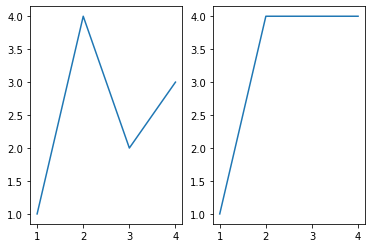

In [38]:
fig, axs = plt.subplots(1, 2)  # Create a figure containing a single axes.
axs[0].plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.
axs[1].plot([1, 2, 3, 4], [1, 4, 4, 4]);  # Plot some data on the axes.

In [39]:
type(axs[0])

matplotlib.axes._subplots.AxesSubplot

Text(0.5, 1.0, 'batata')

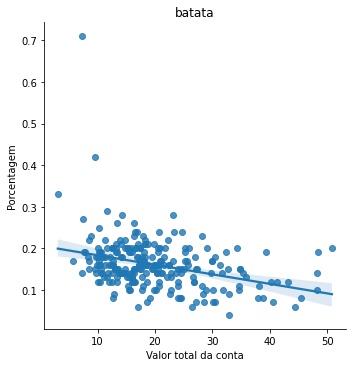

In [40]:
regressions = sns.lmplot(x = 'total_conta', y = 'porcentagem', data = gorjetas)
regressions.set(xlabel = 'Valor total da conta', ylabel = 'Porcentagem')
regressions.ax.set_title('batata')

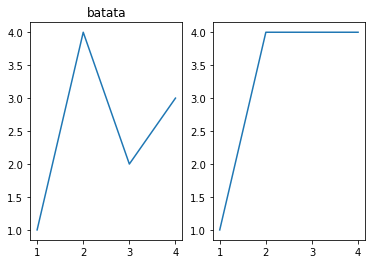

In [41]:
fig, axs = plt.subplots(1, 2) 

# pra plotar os axes
axs[0].plot([1, 2, 3, 4], [1, 4, 2, 3]); 
axs[0].set_title('batata')
axs[1].plot([1, 2, 3, 4], [1, 4, 4, 4]); 

In [42]:
import numpy as np

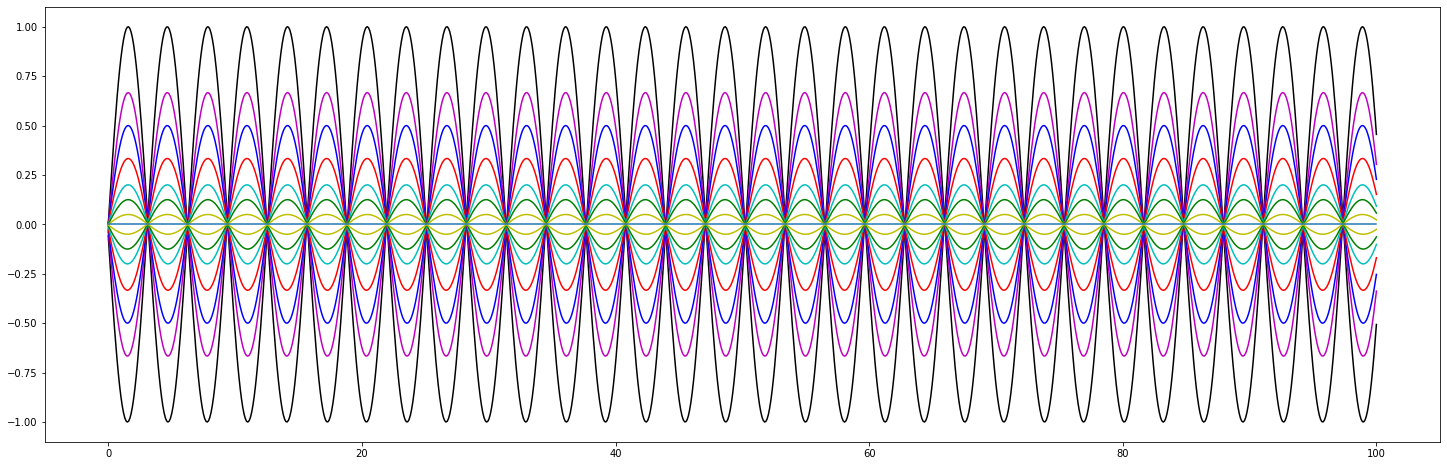

In [43]:
x = np.linspace(0, 100, num=1000)

fig, axs = plt.subplots(figsize=(25, 8))

axs.plot(x, (np.sin(x)), 'k')
axs.plot(x, (np.sin(x + 3.2)), 'k')

axs.plot(x, (np.sin(x) / 1.5), 'm')
axs.plot(x, (np.sin(x + 3.2) / 1.5), 'm')

axs.plot(x, (np.sin(x) / 2), 'b')
axs.plot(x, (np.sin(x + 3.2) / 2), 'b')

axs.plot(x, (np.sin(x) / 3), 'r')
axs.plot(x, (np.sin(x + 3.2) / 3), 'r')

axs.plot(x, (np.sin(x) / 5), 'c')
axs.plot(x, (np.sin(x + 3.2) / 5), 'c')

axs.plot(x, (np.sin(x) / 8), 'g')
axs.plot(x, (np.sin(x + 3.2) / 8), 'g')

axs.plot(x, (np.sin(x) / 20), 'y')
axs.plot(x, (np.sin(x + 3.2) / 20), 'y')

axs.plot(x, x*0)


In [44]:
fig.savefig('batata', dpi=300)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c0af95510>


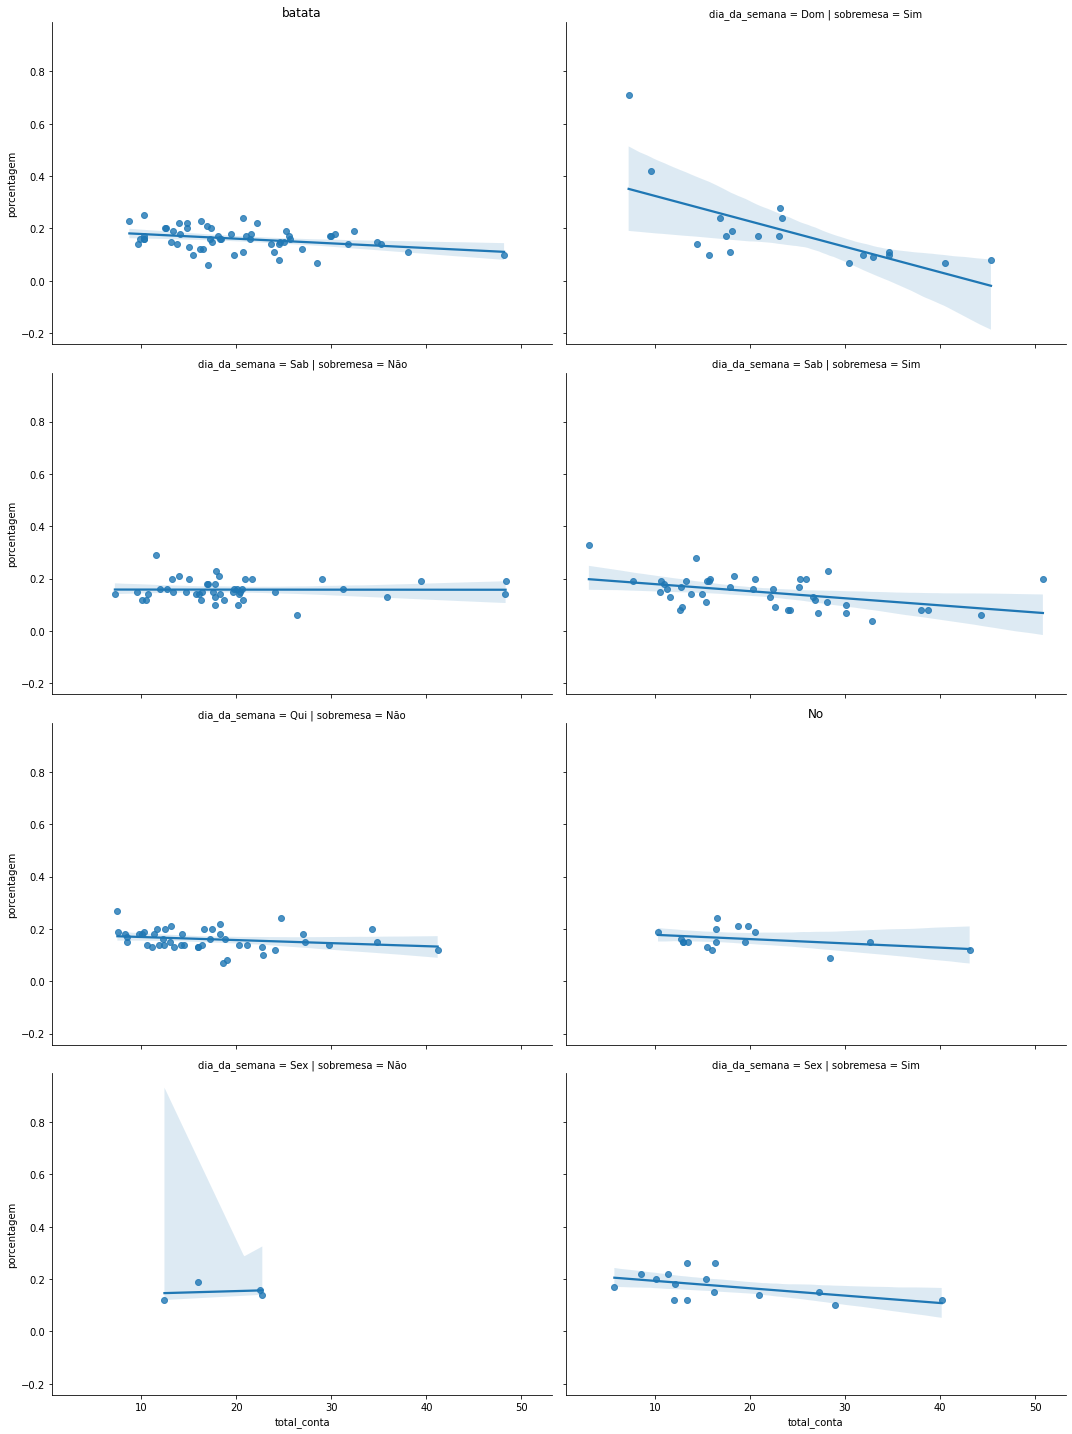

In [45]:
regressions = sns.lmplot(x = 'total_conta', y = 'porcentagem', data = gorjetas, col='sobremesa', row = 'dia_da_semana', aspect = 1.5)
regressions.axes[0][0].set_title('batata')
regressions.axes[2][1].set_title('No')
print(regressions.axes)

In [46]:
type(regressions.axes)
regressions.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c0af95510>,
      dtype=object)